In [1]:
import numpy as np
import pickle as pk
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

from asteroid_utils_pixell import  get_desig

import requests, json

import seaborn as sns
sns.set_theme(style="ticks")

In [2]:
def get_tholen(name):
    response = requests.get("https://ssd-api.jpl.nasa.gov/sbdb.api?sstr={}&phys-par=1".format(name))
    for i in range(len(response.json()['phys_par'])):
        if response.json()['phys_par'][i]['title'] == 'Tholen spectral type':
            return response.json()['phys_par'][i]['value']
    print('Error: no Tholen type')
    
    return np.nan

def get_SMASSII(name):
    response = requests.get("https://ssd-api.jpl.nasa.gov/sbdb.api?sstr={}&phys-par=1".format(name))
    for i in range(len(response.json()['phys_par'])):
        if response.json()['phys_par'][i]['title'] == 'SMASSII spectral type':
            return response.json()['phys_par'][i]['value']
    print('Error: no SMASSII type')
    
    return np.nan

In [3]:
with open('/home/r/rbond/jorlo/dev/minorplanets/normalized_theory_flux_dict.pk', 'rb') as f:
    load_theory_flux_dict = pk.load(f)
    print(len(load_theory_flux_dict.keys()))


907


In [4]:
def inv_var(data, variances):
    ave = 0
    var = 0
    for i in range(len(data)):
        ave += data[i]/variances[i]
        var += 1/variances[i]
    return ave/var, 1/var

### 90 vs 220

In [5]:
normalized = True

if normalized:
    with open('/home/r/rbond/jorlo/dev/minorplanets/normalized_theory_flux_dict.pk', 'rb') as f:
        theory_flux_dict = pk.load(f)
else:
    with open('/home/r/rbond/jorlo/dev/minorplanets/theory_flux_dict.pk', 'rb') as f:
        theory_flux_dict = pk.load(f)    

rel_delta_090 = []
rel_delta_150 = []
rel_delta_220 = []

rel_delta_090_err = []
rel_delta_150_err = []
rel_delta_220_err = []

delta_090 = []
delta_150 = []
delta_220 = []

stat_delta_090 = []
stat_delta_150 = []
stat_delta_220 = []

delta_090_err = []
delta_150_err = []
delta_220_err = []

sn_090 = []
sn_150 = []
sn_220 = []
total_sn = []

delta_090_220 = []
delta_090_220_err = []

delta_150_220 = []
delta_150_220_err = []

delta_090_150 = []
delta_090_150_err = []

flux_90 = []
flux_90_err = []

flux_150s = []
flux_150_errs = []

flux_220s = []
flux_220_errs = []


names = []
tholens = []
smasses=[]

for i in range(len(theory_flux_dict.keys())):
#for i in range(100):
    desig, name, semimajor = get_desig(i)

    flux_dir = '/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/'
    
    if name not in theory_flux_dict.keys(): 
        continue

    try:
        with open(flux_dir+ '{}_flux_dict.pk'.format(name), 'rb') as f:
            flux_dict = pk.load(f)
    except: 
        print('not in flux dict')
        continue
    names.append(name)
    flux_pa4_150, err_pa4_150 = flux_dict['night']['pa4']['150']['flux'], flux_dict['night']['pa4']['150']['var']
    flux_pa4_220, err_pa4_220 = flux_dict['night']['pa4']['220']['flux'], flux_dict['night']['pa4']['220']['var']

    flux_pa5_090, err_pa5_090 = flux_dict['night']['pa5']['090']['flux'], flux_dict['night']['pa5']['090']['var']
    flux_pa5_150, err_pa5_150 = flux_dict['night']['pa5']['150']['flux'], flux_dict['night']['pa5']['150']['var']

    flux_pa6_090, err_pa6_090 = flux_dict['night']['pa6']['090']['flux'], flux_dict['night']['pa6']['090']['var']
    flux_pa6_150, err_pa6_150 = flux_dict['night']['pa6']['150']['flux'], flux_dict['night']['pa6']['150']['var']

    err_pa4_220 = max(err_pa4_220, 0.05*flux_pa4_220)    
    
    '''
    err_pa4_150 = max(err_pa4_150, 0.05*flux_pa4_150)    
    
    err_pa5_090 = max(err_pa5_090, 0.05*flux_pa5_090)
    err_pa5_150 = max(err_pa5_150, 0.05*flux_pa5_150)
    
    err_pa6_090 = max(err_pa6_090, 0.05*flux_pa6_090)
    err_pa6_150 = max(err_pa6_150, 0.05*flux_pa6_150)
    '''
    
    #theory_flux_090 = max(theory_flux_dict[name]['run5b'][0], theory_flux_dict[name]['run5a'][0])
    #theory_flux_150 = max(theory_flux_dict[name]['run5b'][1], theory_flux_dict[name]['run5a'][1])
    #theory_flux_220 = max(theory_flux_dict[name]['run5b'][2], theory_flux_dict[name]['run5a'][2])
    
    theory_flux_090 = theory_flux_dict[name]['run5a'][0]
    theory_flux_150 = theory_flux_dict[name]['run5a'][1]
    theory_flux_220 = theory_flux_dict[name]['run5a'][2]
    
    if err_pa4_150 == 0:
        err_pa4_150 = 999999
    if err_pa5_150 == 0:
        err_pa5_150 = 999999
    if err_pa6_150 == 0:
        err_pa6_150 = 999999
    if err_pa4_220 == 0:
        err_pa4_220 = 999999
    if err_pa5_090 == 0:
        err_pa5_090 = 999999
    if err_pa6_090 == 0:
        err_pa6_090 = 999999
        
    flux_090, err_090 = inv_var([flux_pa5_090, flux_pa6_090], [err_pa5_090**2, err_pa6_090**2])
    flux_150, err_150 = inv_var([flux_pa4_150, flux_pa5_150, flux_pa6_150], [err_pa4_150**2, err_pa5_150**2, err_pa6_150**2])
    flux_220, err_220 = flux_pa4_220, err_pa4_220
    
    #inv_var returns things in variances, so have to take sqrt
    err_090, err_150 = np.sqrt(err_090), np.sqrt(err_150)
    
    stat_err_090 = err_090
    stat_err_150 = err_150
    stat_err_220 = err_220
    
    err_090 = max(0.01*flux_090, err_090)
    err_150 = max(0.01*flux_150, err_150)
    err_220 = max(0.01*flux_220, err_220)

    rel_delta_090_cur = (flux_090 - theory_flux_090)/theory_flux_090
    rel_delta_150_cur = (flux_150 - theory_flux_150)/theory_flux_150
    rel_delta_220_cur = (flux_220 - theory_flux_220)/theory_flux_220
    
    delta_090_cur = (flux_090 - theory_flux_090)
    delta_150_cur = (flux_150 - theory_flux_150)
    delta_220_cur = (flux_220 - theory_flux_220)
    
    rel_delta_090.append(rel_delta_090_cur)
    rel_delta_150.append(rel_delta_150_cur)
    rel_delta_220.append(rel_delta_220_cur)
    
    delta_090.append(delta_090_cur)
    delta_150.append(delta_150_cur)
    delta_220.append(delta_220_cur)
    
    delta_090_err_cur = err_090
    delta_150_err_cur = err_150
    delta_220_err_cur = err_220
    
    delta_090_err.append(delta_090_err_cur)
    delta_150_err.append(delta_150_err_cur)
    delta_220_err.append(delta_220_err_cur)
    
    rel_delta_090_err_cur = rel_delta_090_cur * (delta_090_err_cur / delta_090_cur)
    rel_delta_150_err_cur = rel_delta_150_cur * (delta_150_err_cur / delta_150_cur)
    rel_delta_220_err_cur = rel_delta_220_cur * (delta_220_err_cur / delta_220_cur)
    
    rel_delta_090_err.append(rel_delta_090_err_cur)
    rel_delta_150_err.append(rel_delta_150_err_cur)
    rel_delta_220_err.append(rel_delta_220_err_cur)
    
    sn_090_cur = flux_090 / delta_090_err_cur
    sn_150_cur = flux_150 / delta_150_err_cur
    sn_220_cur = flux_220 / delta_220_err_cur
    
    sn_090.append(sn_090_cur)
    sn_150.append(sn_150_cur)
    sn_220.append(sn_220_cur)
    
    delta_090_220_cur = delta_220_cur / delta_090_cur
    delta_090_220_err_cur = delta_090_220_cur * (delta_090_err_cur/delta_090_cur + delta_220_err_cur/delta_220_cur)

    delta_090_220.append(delta_090_220_cur)
    delta_090_220_err.append(delta_090_220_err_cur)
    
    delta_150_220_cur = delta_220_cur / delta_150_cur
    delta_150_220_err_cur = delta_150_220_cur * (delta_150_err_cur/delta_150_cur + delta_220_err_cur/delta_220_cur)

    delta_150_220.append(delta_150_220_cur)
    delta_150_220_err.append(delta_150_220_err_cur)
    
    delta_090_150_cur = delta_150_cur / delta_090_cur
    delta_090_150_err_cur = delta_090_150_cur * (delta_150_err_cur/delta_150_cur + delta_090_err_cur/delta_090_cur)

    delta_090_150.append(delta_090_150_cur)
    delta_090_150_err.append(delta_090_150_err_cur)
    
    flux_90.append(flux_090)
    flux_90_err.append(err_090)
    
    flux_150s.append(flux_150)
    flux_150_errs.append(err_150)
    
    flux_220s.append(flux_220)
    flux_220_errs.append(err_220)
    
    if rel_delta_090_cur > 0.5 and rel_delta_220_cur >0.5 and sn_090_cur > 3 and sn_220_cur > 3:
        print(name)
        
    #tholen_type = get_tholen(name)
    #smass_type = get_SMASSII(name)
    
    #tholens.append(tholen_type)
    #smasses.append(smass_type)
    
    sn_tot = np.sqrt(max(0, sn_090_cur)**2 + max(0, sn_150_cur)**2 + max(0, sn_220_cur)**2)
    
    total_sn.append(sn_tot)


rel_delta_090 = np.array(rel_delta_090)
rel_delta_150 = np.array(rel_delta_150)
rel_delta_220 = np.array(rel_delta_220)

stat_err_090 = np.array(stat_err_090)
stat_err_150 = np.array(stat_err_150)
stat_err_220 = np.array(stat_err_220)

delta_090 = np.array(delta_090)
delta_150 = np.array(delta_150)
delta_220 = np.array(delta_220)

delta_090_err = np.array(delta_090_err)
delta_150_err = np.array(delta_150_err)
delta_220_err = np.array(delta_220_err)

rel_delta_090_err = np.array(rel_delta_090_err)
rel_delta_150_err = np.array(rel_delta_150_err)
rel_delta_220_err = np.array(rel_delta_220_err)

sn_090 = np.array(sn_090)
sn_150 = np.array(sn_150)
sn_220 = np.array(sn_220)

delta_090_220 = np.array(delta_090_220)
delta_090_220_err = np.array(delta_090_220_err)

delta_150_220 = np.array(delta_150_220)
delta_150_220_err = np.array(delta_150_220_err)

delta_090_150 = np.array(delta_090_150)
delta_090_150_err = np.array(delta_090_150_err)

flux_90 = np.array(flux_90)
flux_90_err = np.array(flux_90_err)

flux_150s = np.array(flux_150s)
flux_150_errs = np.array(flux_150_errs)

flux_220s = np.array(flux_220s)
flux_220_errs = np.array(flux_220_errs)

names = np.array(names)
total_sn = np.array(total_sn)

Diotima
Mandeville
Kolga


In [6]:
names[np.where((sn_150)>=10)[0]]

array(['Vesta', 'Pallas', 'Hebe', 'Eunomia', 'Melpomene', 'Flora',
       'Amphitrite', 'Herculina', 'Hygiea', 'Laetitia', 'Julia',
       'Parthenope', 'Bamberga', 'Interamnia', 'Harmonia', 'Egeria',
       'Davida', 'Fortuna', 'Europa', 'Nemausa', 'Euphrosyne',
       'Patientia', 'Prokne', 'Elektra', 'Alexandra', 'Desiderata',
       'Eunike', 'Eugenia', 'Doris', 'Nemesis', 'Themis', 'Sylvia',
       'Siegena', 'Diotima', 'Berbericia', 'Minerva', 'Elpis', 'Eukrate',
       'Ate', 'Camilla', 'Hispania', 'Hestia', 'Atalante', 'Germania',
       'Boliviana', 'Bertha', 'Lachesis', 'Aletheia', 'Hypatia',
       'Arethusa', 'Cava', 'Tanete', 'Freia', 'Virginia', 'Nuwa',
       'Adorea'], dtype='<U13')

In [7]:
np.where((sn_150)>=10)[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  11,  12,  13,  14,
        18,  20,  23,  25,  27,  33,  37,  39,  41,  45,  57,  59,  61,
        62,  65,  67,  70,  72,  75,  76,  78,  84,  85,  93,  94,  95,
        98,  99, 108, 113, 121, 127, 132, 135, 138, 145, 146, 154, 199,
       200, 213, 218, 230])

In [8]:
to_dump = {}

for i, name in enumerate(names):
    to_dump[name] = {}
    to_dump[name]['090'] = [1+rel_delta_090[i], rel_delta_090_err[i]]
    to_dump[name]['150'] = [1+rel_delta_150[i], rel_delta_150_err[i]]
    to_dump[name]['220'] = [1+rel_delta_220[i], rel_delta_220_err[i]]

    
with open('./pks/sups.pk', 'wb') as f:
    pk.dump(to_dump, f)

In [9]:
print(1+rel_delta_090[0], rel_delta_090_err[0])
print(1+rel_delta_150[0], rel_delta_150_err[0])
print(1+rel_delta_220[0], rel_delta_220_err[0])

0.9354571877509428 0.010296321975849575
0.7415851877165345 0.007415851877165344
0.7107337086519798 0.035536685432599


In [10]:
 with open(flux_dir+ '{}_flux_dict.pk'.format('Davida'), 'rb') as f:
            flux_dict = pk.load(f)

In [11]:
flux_dict['night']

{'pa4': {'150': {'flux': 833.8663751560184, 'var': 33.30595712160725},
  '220': {'flux': 1746.808600254524, 'var': 56.20152375085143}},
 'pa5': {'090': {'flux': 372.4661415519815, 'var': 16.958561244548086},
  '150': {'flux': 758.9894507883442, 'var': 21.429176208935306}},
 'pa6': {'090': {'flux': 389.34759769774115, 'var': 18.660853026933218},
  '150': {'flux': 776.7166263651892, 'var': 23.987464943641534}}}

In [12]:
df = pd.DataFrame(np.stack([rel_delta_090*100, rel_delta_150*100, rel_delta_220*100]).T,
                   columns=[r'$\%\Delta F_{090}$', r'$\%\Delta F_{150}$', r'$\%\Delta F_{220}$'])

<Figure size 450.618x450.618 with 0 Axes>

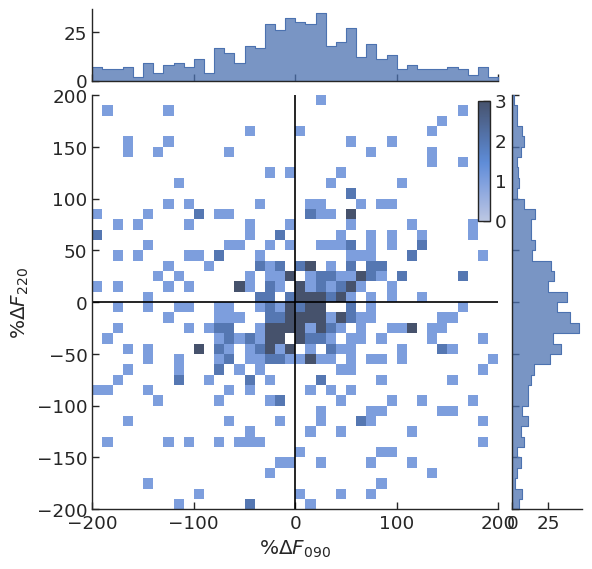

In [13]:
matplotlib.rc('font',**{'family':'serif','sans-serif':['Times'],'size':16})

plt.rc('font',family='serif',size=16)

fullpage = False

# ------------------------------------------------------------------------------------------

dpi = 72.27*390.00/504.00

factory = 0.50
factorx = 1.00 if fullpage else 0.50
figsize = (factorx*504.00/dpi,factory*504.00/dpi)

fig = plt.figure(figsize=figsize)


sns.set_style("ticks", {"xtick.direction": "in","ytick.direction": "in"})
sns.set_context("paper",font_scale=1.5)
g = sns.JointGrid(data = df, x = r'$\%\Delta F_{090}$', y = r'$\%\Delta F_{220}$', marginal_ticks = True)

# Create an inset legend for the histogram colorbar
cax = g.fig.add_axes([.78, .6, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, #discrete=(True, False),
    #cmap="light:#03012d", 
    pmax=.8, cbar=True, cbar_ax=cax,
    bins = 40, binrange = (-200, 200)
)
g.plot_marginals(sns.histplot, bins = 40, binrange = (-200, 200), element="step")#, color="#03012d")

g.ax_marg_x.set_xlim(-200, 200)
g.ax_marg_y.set_ylim(-200, 200)

g.ax_joint.axvline(x=0, color='black')
g.ax_joint.axhline(y=0, color='black')

#plt.savefig('./plots/090_vs_220_hist.pdf', dpi = 600)
#plt.savefig('./plots/090_vs_220_hist.png', dpi = 600)
#plt.show()
#plt.close()

/tmp/ipykernel_86981/3238590040.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  top = cm.get_cmap('Blues_r', 128)
/tmp/ipykernel_86981/3238590040.py:10: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  cm.register_cmap('model', cmap = ListedColormap(newcolors))


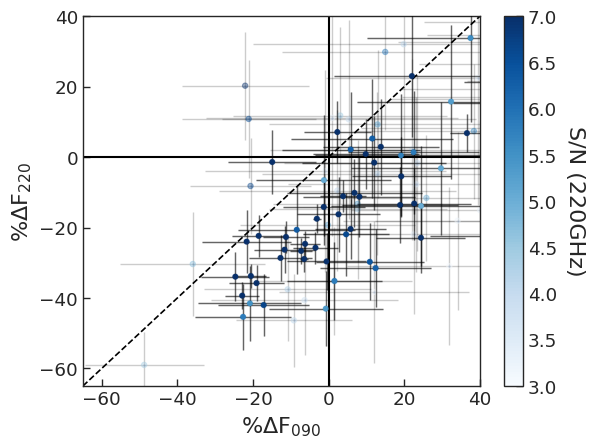

In [14]:
textsize = 16

## blue-orange colormap:
import matplotlib.cm as cm

top = cm.get_cmap('Blues_r', 128)
newcolors = np.vstack((top(np.linspace(1, 0, 128))))#,bottom(numpy.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('model', cmap = ListedColormap(newcolors))
cmap = 'model'
#######

flags = np.where((sn_090 >=3) & (sn_220>= 3))[0]

flags_5 = np.where((sn_090 >=5) & (sn_220>= 5))[0]

#flags = np.ones(len(delta_090), dtype=bool)

lim = -65

fig, ax = plt.subplots(1,1)

#plt.scatter(delta_090[flags], delta_220[flags], zorder = 2, s = 5, c =sn_220[flags], vmin = 1, vmax = 5, cmap=cmap)
#plt.errorbar(delta_090[flags], delta_220[flags], xerr=delta_090_err[flags], yerr=delta_220_err[flags],
#             fmt='o', alpha = 0.4, ecolor = 'black', zorder = 1, ms = 1, elinewidth = 1.)

#plt.scatter(100*rel_delta_090, 100*rel_delta_220, s=10, zorder = 0, alpha = 0.2)



plt.scatter(100*rel_delta_090[flags], 100*rel_delta_220[flags], zorder = 2, s = 15, c =sn_220[flags], vmin = 3, vmax = 7, cmap=cmap, alpha = 0.4)
plt.errorbar(100*rel_delta_090[flags], 100*rel_delta_220[flags], xerr=100*rel_delta_090_err[flags], yerr=100*rel_delta_220_err[flags],
             fmt='o', alpha = 0.2, ecolor = 'black', zorder = 1, ms = 1, elinewidth = 1.)

plt.scatter(100*rel_delta_090[flags_5], 100*rel_delta_220[flags_5], zorder = 4, s = 10, c =sn_220[flags_5], vmin = 3, vmax = 7, cmap=cmap)
plt.errorbar(100*rel_delta_090[flags_5], 100*rel_delta_220[flags_5], xerr=100*rel_delta_090_err[flags_5], yerr=100*rel_delta_220_err[flags_5],
             fmt='o', alpha = 0.5, ecolor = 'black', zorder = 3, ms = 1, elinewidth = 1.)

ax.axhline(0, color = 'black', linewidth=1.5)
ax.axvline(0, color = 'black', linewidth=1.5)

plt.xlim(lim,40)
plt.ylim(lim,40)

xs = np.linspace(lim, 40)

cbar = plt.colorbar()
cbar.set_label('S/N (220GHz)', rotation=270, labelpad = 20, size = textsize)

#ax.annotate("Relative deficit at 220GHz", xy = (-20, -20), size = 10, xytext = (-53, -60), color = "darkred")
#ax.annotate("Relative deficit at 90GHz", xy = (-20, -20), size = 10, xytext = (-63, 15), color = "darkred")

plt.plot(xs, xs, ls = '--', c = 'black')
plt.xlabel(r'$\%\Delta \mathrm{F}_{090}$', size = textsize)
plt.ylabel(r'$\%\Delta \mathrm{F}_{220}$', size = textsize)

#plt.title('220 vs 90GHz Flux for some High SN Asteroids')
plt.savefig('/home/r/rbond/jorlo/dev/minorplanets/plots/delta_F.pdf', bbox_inches='tight', dpi=600)
plt.savefig('/home/r/rbond/jorlo/dev/minorplanets/plots/delta_F.png', bbox_inches='tight', dpi=600)

## Only plot some errorbars

In [ ]:
textsize = 16

## blue-orange colormap:
import matplotlib.cm as cm

top = cm.get_cmap('Blues_r', 128)
newcolors = np.vstack((top(np.linspace(1, 0, 128))))#,bottom(numpy.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
#cm.register_cmap('model', cmap = ListedColormap(newcolors))
#cmap = 'model'
#######

flags = np.where((sn_090 >=3) & (sn_220>= 3))[0]

flags_5 = np.where((sn_090 >=5) & (sn_220>= 5))[0]

#flags = np.ones(len(delta_090), dtype=bool)

lim = -65

fig, ax = plt.subplots(1,1)

#plt.scatter(delta_090[flags], delta_220[flags], zorder = 2, s = 5, c =sn_220[flags], vmin = 1, vmax = 5, cmap=cmap)
#plt.errorbar(delta_090[flags], delta_220[flags], xerr=delta_090_err[flags], yerr=delta_220_err[flags],
#             fmt='o', alpha = 0.4, ecolor = 'black', zorder = 1, ms = 1, elinewidth = 1.)

#plt.scatter(100*rel_delta_090, 100*rel_delta_220, s=10, zorder = 0, alpha = 0.2)

use_090_err = np.zeros(len(flags))
use_220_err = np.zeros(len(flags))

use_090_err_5 = np.zeros(len(flags_5))
use_220_err_5 = np.zeros(len(flags_5))

for i in range(len(flags)):
    if i%5==0:
        use_090_err[i] = rel_delta_090_err[flags][i]
        use_220_err[i] = rel_delta_220_err[flags][i]

for i in range(len(flags_5)):
    if i%5==0:
        use_090_err_5[i] = rel_delta_090_err[flags_5][i]
        use_220_err_5[i] = rel_delta_220_err[flags_5][i]

plt.scatter(100*rel_delta_090[flags], 100*rel_delta_220[flags], zorder = 2, s = 15, c =sn_220[flags], vmin = 3, vmax = 7, cmap=cmap, alpha = 0.4)
plt.errorbar(100*rel_delta_090[flags], 100*rel_delta_220[flags], xerr=100*use_090_err, yerr=100*use_220_err,
             fmt='o', alpha = 0.2, ecolor = 'black', zorder = 1, ms = 1, elinewidth = 1.)

plt.scatter(100*rel_delta_090[flags_5], 100*rel_delta_220[flags_5], zorder = 4, s = 10, c =sn_220[flags_5], vmin = 3, vmax = 7, cmap=cmap)
plt.errorbar(100*rel_delta_090[flags_5], 100*rel_delta_220[flags_5], xerr=100*use_090_err_5, yerr=100*use_220_err_5,
             fmt='o', alpha = 0.5, ecolor = 'black', zorder = 3, ms = 1, elinewidth = 1.)

ax.axhline(0, color = 'black', linewidth=1.5)
ax.axvline(0, color = 'black', linewidth=1.5)

plt.xlim(lim,40)
plt.ylim(lim,40)

xs = np.linspace(lim, 40)

cbar = plt.colorbar()
cbar.set_label('S/N (220GHz)', rotation=270, labelpad = 20, size = textsize)

#ax.annotate("Relative deficit at 220GHz", xy = (-20, -20), size = 10, xytext = (-53, -60), color = "darkred")
#ax.annotate("Relative deficit at 90GHz", xy = (-20, -20), size = 10, xytext = (-63, 15), color = "darkred")

plt.plot(xs, xs, ls = '--', c = 'black')
plt.xlabel(r'$\%\Delta \mathrm{F}_{090}$', size = textsize)
plt.ylabel(r'$\%\Delta \mathrm{F}_{220}$', size = textsize)

#plt.title('220 vs 90GHz Flux for some High SN Asteroids')
plt.savefig('/home/r/rbond/jorlo/dev/minorplanets/plots/delta_F.pdf', bbox_inches='tight', dpi=600)
plt.savefig('/home/r/rbond/jorlo/dev/minorplanets/plots/delta_F.png', bbox_inches='tight', dpi=600)

In [31]:
use_090_err

array([0.01029632, 0.        , 0.        , 0.        , 0.        ,
       0.04560007, 0.        , 0.        , 0.        , 0.        ,
       0.0713197 , 0.        , 0.        , 0.        , 0.        ,
       0.06031866, 0.        , 0.        , 0.        , 0.        ,
       0.04510996, 0.        , 0.        , 0.        , 0.        ,
       0.11371948, 0.        , 0.        , 0.        , 0.        ,
       0.17718282, 0.        , 0.        , 0.        , 0.        ,
       0.13037191, 0.        , 0.        , 0.        , 0.        ,
       0.07995083, 0.        , 0.        , 0.        , 0.        ,
       0.12030266, 0.        , 0.        , 0.        , 0.        ,
       0.14366247, 0.        , 0.        , 0.        , 0.        ,
       0.15526409, 0.        , 0.        , 0.        , 0.        ,
       0.2742807 , 0.        , 0.        , 0.        , 0.        ,
       0.14583372, 0.        , 0.        , 0.        , 0.        ,
       0.2064135 , 0.        , 0.        , 0.        , 0.     

/tmp/ipykernel_85528/4142720341.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  top = cm.get_cmap('Blues_r', 128)


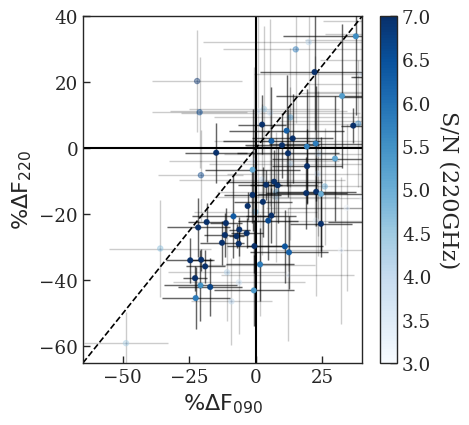

<Figure size 450.618x450.618 with 0 Axes>

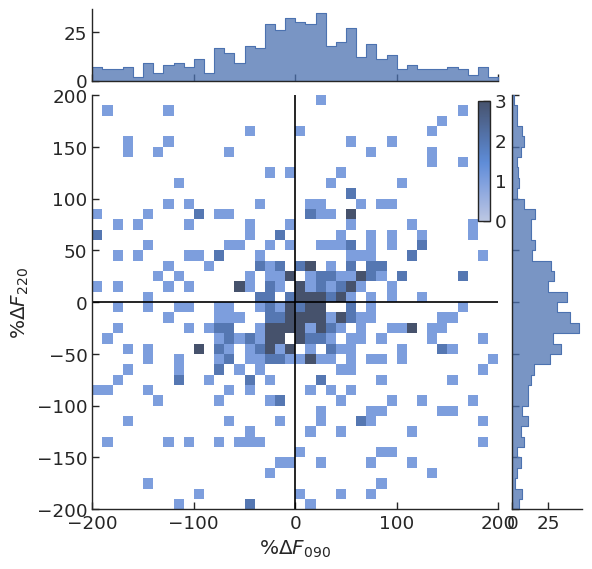

In [15]:
matplotlib.rc('font',**{'family':'serif','sans-serif':['Times'],'size':16})

plt.rc('font',family='serif',size=16)

fullpage = False

# ------------------------------------------------------------------------------------------

dpi = 72.27*390.00/504.00

factory = 0.50
factorx = 1.00 if fullpage else 0.50
figsize = (factorx*504.00/dpi,factory*504.00/dpi)
## blue-orange colormap:
import matplotlib.cm as cm

top = cm.get_cmap('Blues_r', 128)
newcolors = np.vstack((top(np.linspace(1, 0, 128))))#,bottom(numpy.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
#cm.register_cmap('model', cmap = ListedColormap(newcolors))
#cmap = 'model'
#######

flags = np.where((sn_090 >=3) & (sn_220>= 3))[0]
flags_5 = np.where((sn_090 >=5) & (sn_220>= 5))[0]

lim = -65

fig = plt.figure(figsize=figsize)
#ax_dif = fig.add_subplot(1,1,1)
#ax_hist = fig.add_subplot(2,1,2)

#for_cbar = ax_dif.scatter(100*rel_delta_090[flags], 100*rel_delta_220[flags], zorder = 2, s = 15, c =sn_220[flags], vmin = 3, vmax = 7, cmap=cmap, alpha = 0.4)
plt.scatter(100*rel_delta_090[flags], 100*rel_delta_220[flags], zorder = 2, s = 15, c =sn_220[flags], vmin = 3, vmax = 7, cmap=cmap, alpha = 0.4)
plt.errorbar(100*rel_delta_090[flags], 100*rel_delta_220[flags], xerr=100*rel_delta_090_err[flags], yerr=100*rel_delta_220_err[flags],
             fmt='o', alpha = 0.2, ecolor = 'black', zorder = 1, ms = 1, elinewidth = 1.)

plt.scatter(100*rel_delta_090[flags_5], 100*rel_delta_220[flags_5], zorder = 4, s = 10, c =sn_220[flags_5], vmin = 3, vmax = 7, cmap=cmap)
plt.errorbar(100*rel_delta_090[flags_5], 100*rel_delta_220[flags_5], xerr=100*rel_delta_090_err[flags_5], yerr=100*rel_delta_220_err[flags_5],
             fmt='o', alpha = 0.5, ecolor = 'black', zorder = 3, ms = 1, elinewidth = 1.)

plt.axhline(0, color = 'black', linewidth=1.5)
plt.axvline(0, color = 'black', linewidth=1.5)

plt.xlim(lim,40)
plt.ylim(lim,40)

xs = np.linspace(lim, 40)

cbar = plt.colorbar()
cbar.set_label('S/N (220GHz)', rotation=270, labelpad = 20, size = textsize)

#divider = make_axes_locatable(ax_dif)
#cax = divider.append_axes('right', size='5%', pad=0.05)

#cbar = fig.colorbar(for_cbar, cax=cax)
#cbar.set_label('S/N (220GHz)', rotation=270, size = textsize)

#ax.annotate("Relative deficit at 220GHz", xy = (-20, -20), size = 10, xytext = (-53, -60), color = "darkred")
#ax.annotate("Relative deficit at 90GHz", xy = (-20, -20), size = 10, xytext = (-63, 15), color = "darkred")

plt.plot(xs, xs, ls = '--', c = 'black')
plt.xlabel(r'$\%\Delta \mathrm{F}_{090}$', size = textsize)
plt.ylabel(r'$\%\Delta \mathrm{F}_{220}$', size = textsize)

plt.show()
plt.close();

fig = plt.figure(figsize=figsize)

sns.set_style("ticks", {"xtick.direction": "in","ytick.direction": "in"})
sns.set_context("paper",font_scale=1.5)
g = sns.JointGrid(data = df, x = r'$\%\Delta F_{090}$', y = r'$\%\Delta F_{220}$', marginal_ticks = True)

# Create an inset legend for the histogram colorbar
cax = g.fig.add_axes([.78, .6, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, #discrete=(True, False),
    #cmap="light:#03012d", 
    pmax=.8, cbar=True, cbar_ax=cax,
    bins = 40, binrange = (-200, 200)
)
g.plot_marginals(sns.histplot, bins = 40, binrange = (-200, 200), element="step")#, color="#03012d")

g.ax_marg_x.set_xlim(-200, 200)
g.ax_marg_y.set_ylim(-200, 200)

g.ax_joint.axvline(x=0, color='black')
g.ax_joint.axhline(y=0, color='black')

plt.show()
plt.close();

In [9]:
len(flags)

102

In [10]:
len(np.where((rel_delta_090[flags] >= rel_delta_150[flags]))[0])

98

In [11]:
len(np.where((rel_delta_090[flags] >= rel_delta_220[flags]))[0])

88

In [12]:
len(np.where((rel_delta_090[flags] >= rel_delta_220[flags]+2*np.sqrt(rel_delta_090_err[flags]**2+rel_delta_220_err[flags]**2)))[0])

16

In [16]:
len(np.where((rel_delta_090[flags]+np.sqrt(rel_delta_090_err[flags]**2+rel_delta_220_err[flags]**2) <= rel_delta_220[flags]))[0])

2

In [13]:
name_flags = np.where((rel_delta_090[flags]+np.sqrt(rel_delta_090_err[flags]**2+rel_delta_220_err[flags]**2) <= rel_delta_220[flags]))

print(names[name_flags])

['Ausonia' 'Alexandra']


In [7]:
cut1 = 5
cut2 = 10000

flags_090 = np.where((sn_090 > cut1) & (sn_090 < cut2))[0]
flags_150 = np.where((sn_150 > cut1) & (sn_150 < cut2))[0]
flags_220 = np.where((sn_220 > cut1) & (sn_220 < cut2))[0]

flags_tot = np.where((total_sn >= cut1))[0]

#delta_090_stack, err_delta_090_stack = inv_var(rel_delta_090[flags_090], rel_delta_090_err[flags_090]**2)
#delta_150_stack, err_delta_150_stack = inv_var(rel_delta_150[flags_150], rel_delta_150_err[flags_150]**2)
#delta_220_stack, err_delta_220_stack = inv_var(rel_delta_220[flags_220], rel_delta_220_err[flags_220]**2)

delta_090_stack, err_delta_090_stack = inv_var(rel_delta_090[flags_tot], rel_delta_090_err[flags_tot]**2)
delta_150_stack, err_delta_150_stack = inv_var(rel_delta_150[flags_tot], rel_delta_150_err[flags_tot]**2)
delta_220_stack, err_delta_220_stack = inv_var(rel_delta_220[flags_tot], rel_delta_220_err[flags_tot]**2)

print("Delta 090: {} +/- {}".format(delta_090_stack, np.sqrt(err_delta_090_stack)))
print("Delta 150: {} +/- {}".format(delta_150_stack, np.sqrt(err_delta_150_stack)))
print("Delta 220: {} +/- {}".format(delta_220_stack, np.sqrt(err_delta_220_stack)))

Delta 090: -0.039752527800784226 +/- 0.005955473449581552
Delta 150: -0.23682577693009477 +/- 0.003510126171958229
Delta 220: -0.21563772734724798 +/- 0.008961391658868853


In [8]:
len(flags_tot)

177

In [22]:
gold_cut = 5
gold_flags = np.where((sn_090 > gold_cut) &(sn_150 > gold_cut) & (sn_220 > gold_cut))[0]

delta_090_stack, err_delta_090_stack = inv_var(rel_delta_090[gold_flags], rel_delta_090_err[gold_flags]**2)
delta_150_stack, err_delta_150_stack = inv_var(rel_delta_150[gold_flags], rel_delta_150_err[gold_flags]**2)
delta_220_stack, err_delta_220_stack = inv_var(rel_delta_220[gold_flags], rel_delta_220_err[gold_flags]**2)

print("Delta 090: {} +/- {}".format(delta_090_stack, np.sqrt(err_delta_090_stack)))
print("Delta 150: {} +/- {}".format(delta_150_stack, np.sqrt(err_delta_150_stack)))
print("Delta 220: {} +/- {}".format(delta_220_stack, np.sqrt(err_delta_220_stack)))

Delta 090: 0.15752119488455602 +/- 0.01568206983183493
Delta 150: -0.0528497617968192 +/- 0.00892459519090378
Delta 220: -0.14040817681556225 +/- 0.011426152042942384


In [21]:
np.where((rel_delta_090[gold_flags]-rel_delta_090_err[gold_flags]) == max(rel_delta_090[gold_flags]-rel_delta_090_err[gold_flags]))

NameError: name 'gold_flags' is not defined

In [43]:
names[31]

'Leto'

In [44]:
np.where((np.abs(rel_delta_090/rel_delta_090_err) == max(np.abs(rel_delta_090/rel_delta_090_err))))

(array([25]),)

In [45]:
names[25]

'Davida'

In [50]:
rel_delta_090[25]/rel_delta_090_err[25]

5.036342006182959

In [15]:
rel_delta_220[25]

0.06834490935430644

In [67]:
print(len(flags_090), len(flags_150), len(flags_220))

73 84 73


In [26]:
flux_150s

array([ 1.56614786e+03,  2.51953779e+03,  2.49812458e+02,  3.82652142e+02,
        1.21122615e+02,  1.30332109e+02,  2.91491634e+02,  2.85622928e+02,
        1.43464264e+03,  1.46957094e+02,  1.37287531e+02,  2.27172497e+02,
        1.40803132e+02,  1.45681404e+02,  4.72026099e+02,  1.24785186e+02,
        1.56492292e+02,  1.47315183e+02,  8.19482006e+02,  8.26387593e+01,
        8.61141991e+01,  1.40675285e+02, -9.98550063e+00,  3.29284557e+02,
        8.18183287e+01,  7.89543636e+02,  2.07121246e+02,  3.08787431e+02,
        8.75816071e+01,  4.05669896e+01,  3.49220717e+01,  9.99996793e+01,
        3.00157180e+01,  8.69181947e+02,  2.68875777e+01,  9.35781027e+01,
        1.52339685e+02,  1.71535295e+02,  2.83732880e+01,  5.18246913e+02,
        1.15872687e+02,  4.44860592e+02,  4.82709836e+01,  2.12256119e+01,
        2.84292524e+01,  2.37977306e+02,  4.60264633e+01,  7.17516809e+01,
        3.98037383e+01,  7.67997982e+01,  8.30522242e+01,  2.08549842e+02,
        2.00668985e+02,  

In [16]:
flux_150s[0]

1566.147855170411

In [25]:
names

array(['Vesta', 'Pallas', 'Hebe', 'Eunomia', 'Melpomene', 'Flora',
       'Amphitrite', 'Herculina', 'Hygiea', 'Irene', 'Dembowska',
       'Laetitia', 'Julia', 'Parthenope', 'Bamberga', 'Victoria',
       'Nausikaa', 'Eleonora', 'Interamnia', 'Astraea', 'Harmonia',
       'Papagena', 'Ganymed', 'Egeria', 'Kleopatra', 'Davida', 'Kalliope',
       'Fortuna', 'Lutetia', 'Urania', 'Ausonia', 'Leto', 'Ariadne',
       'Europa', 'Antigone', 'Athamantis', 'Niobe', 'Nemausa', 'Sappho',
       'Euphrosyne', 'Philomela', 'Patientia', 'Undina', 'Eurynome',
       'Thetis', 'Prokne', 'Klotho', 'Hesperia', 'Proserpina',
       'Hermentaria', 'Mnemosyne', 'Aspasia', 'Io', 'Pomona', 'Hertha',
       'Rachele', 'Zelinda', 'Elektra', 'Angelina', 'Alexandra', 'Palma',
       'Desiderata', 'Eunike', 'Semiramis', 'Vaticana', 'Eugenia', 'Nina',
       'Doris', 'Hera', 'Asia', 'Nemesis', 'Ilmatar', 'Themis',
       'Anacostia', 'Ampella', 'Sylvia', 'Siegena', 'Anahita', 'Diotima',
       'Danae', 'Amhersti

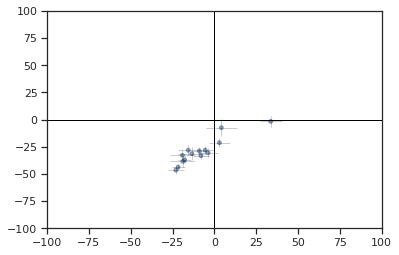

In [70]:
fig, ax = plt.subplots(1,1)

plt.scatter(100*rel_delta_090[gold_flags], 100*rel_delta_220[gold_flags], zorder = 2, s = 15, c =sn_220[gold_flags], vmin = 1, vmax = 5, cmap=cmap, alpha = 0.4)
plt.errorbar(100*rel_delta_090[gold_flags], 100*rel_delta_220[gold_flags], xerr=100*rel_delta_090_err[gold_flags], yerr=100*rel_delta_220_err[gold_flags],
             fmt='o', alpha = 0.2, ecolor = 'black', zorder = 1, ms = 1, elinewidth = 1.)
plt.xlim(-100, 100)
plt.ylim(-100, 100)
ax.axhline(0, color = 'black', linewidth=1.)
ax.axvline(0, color = 'black', linewidth=1.)

In [71]:
rel_delta_090[gold_flags]

array([-0.21678418, -0.08969392, -0.18764508, -0.17803043, -0.22996188,
       -0.15592297, -0.08048838, -0.19065495, -0.03768623,  0.33657158,
        0.03035306, -0.0547028 ,  0.04193381, -0.13455046])

In [72]:
names[gold_flags]

array(['Vesta', 'Pallas', 'Hebe', 'Eunomia', 'Flora', 'Amphitrite',
       'Hygiea', 'Julia', 'Interamnia', 'Davida', 'Fortuna', 'Europa',
       'Patientia', 'Sylvia'], dtype='<U13')

In [52]:
theory_flux_dict['Ratisbona']

{'run0': array([ 18.32467585,  50.52142082, 107.72882291]),
 'run1': array([ 18.89608182,  52.09407677, 111.0754605 ]),
 'run2a': array([ 21.31001144,  58.74484796, 125.24598568]),
 'run2b': array([ 3.68222185, 10.17465299, 21.7526907 ]),
 'run3a': array([ 20.73056895,  57.15152181, 121.85898807]),
 'run3b': array([ 3.94541585, 10.90190599, 23.30750581]),
 'run4a': array([ 20.48214457,  56.46861491, 120.40780654]),
 'run4b': array([ 4.157525  , 11.48800226, 24.56053793]),
 'run5a': array([ 18.42479044,  50.79743756, 108.31738239]),
 'run5b': array([ 21.63577883,  59.62899819, 127.09631352])}

### 150 vs 220

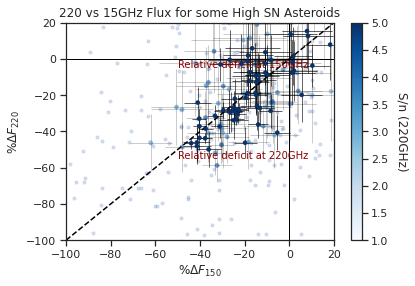

In [22]:
## blue-orange colormap:
import matplotlib.cm as cm

top = cm.get_cmap('Blues_r', 128)
newcolors = np.vstack((top(np.linspace(1, 0, 128))))#,bottom(numpy.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('model', cmap = ListedColormap(newcolors))
cmap = 'model'
#######

flags = np.where((sn_150 >=3) & (sn_220>= 3))[0]

flags_5 = np.where((sn_150 >=5) & (sn_220>= 5))[0]

#flags = np.ones(len(delta_090), dtype=bool)

lim = -100

fig, ax = plt.subplots(1,1)

#plt.scatter(delta_090[flags], delta_220[flags], zorder = 2, s = 5, c =sn_220[flags], vmin = 1, vmax = 5, cmap=cmap)
#plt.errorbar(delta_090[flags], delta_220[flags], xerr=delta_090_err[flags], yerr=delta_220_err[flags],
#             fmt='o', alpha = 0.4, ecolor = 'black', zorder = 1, ms = 1, elinewidth = 1.)

plt.scatter(100*rel_delta_150, 100*rel_delta_220, s=10, zorder = 0, alpha = 0.2)

plt.scatter(100*rel_delta_150[flags], 100*rel_delta_220[flags], zorder = 2, s = 15, c =sn_220[flags], vmin = 1, vmax = 5, cmap=cmap, alpha = 0.4)
plt.errorbar(100*rel_delta_150[flags], 100*rel_delta_220[flags], xerr=100*rel_delta_150_err[flags], yerr=100*rel_delta_220_err[flags],
             fmt='o', alpha = 0.2, ecolor = 'black', zorder = 1, ms = 1, elinewidth = 1.)

plt.scatter(100*rel_delta_150[flags_5], 100*rel_delta_220[flags_5], zorder = 4, s = 10, c =sn_220[flags_5], vmin = 1, vmax = 5, cmap=cmap)
plt.errorbar(100*rel_delta_150[flags_5], 100*rel_delta_220[flags_5], xerr=100*rel_delta_150_err[flags_5], yerr=100*rel_delta_220_err[flags_5],
             fmt='o', alpha = 0.5, ecolor = 'black', zorder = 3, ms = 1, elinewidth = 1.)

ax.axhline(0, color = 'black', linewidth=1.)
ax.axvline(0, color = 'black', linewidth=1.)

plt.xlim(lim,20)
plt.ylim(lim,20)

xs = np.linspace(lim, 20)

cbar = plt.colorbar()
cbar.set_label('S/n (220GHz)', rotation=270, labelpad = 20)

ax.annotate("Relative deficit at 220GHz", xy = (-20, -20), size = 10, xytext = (-50, -55), color = "darkred")
ax.annotate("Relative deficit at 150GHz", xy = (-20, -20), size = 10, xytext = (-50, -5), color = "darkred")

plt.plot(xs, xs, ls = '--', c = 'black')
plt.xlabel(r'$\%\Delta F_{150}$')
plt.ylabel(r'$\%\Delta F_{220}$')

plt.title('220 vs 15GHz Flux for some High SN Asteroids')
plt.savefig('delta_F_150_220.pdf',dpi=600)
plt.savefig('delta_F_150_220.png', dpi=600)

### 90 vs 150

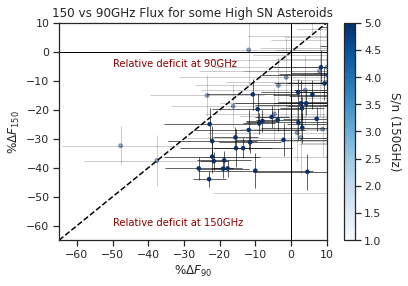

In [23]:
## blue-orange colormap:
import matplotlib.cm as cm

top = cm.get_cmap('Blues_r', 128)
newcolors = np.vstack((top(np.linspace(1, 0, 128))))#,bottom(numpy.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('model', cmap = ListedColormap(newcolors))
cmap = 'model'
#######

flags = np.where((sn_090 >=3) & (sn_150>= 3))[0]

flags_5 = np.where((sn_090 >=5) & (sn_150>= 5))[0]

#flags = np.ones(len(delta_090), dtype=bool)

lim = -65

fig, ax = plt.subplots(1,1)

#plt.scatter(delta_090[flags], delta_220[flags], zorder = 2, s = 5, c =sn_220[flags], vmin = 1, vmax = 5, cmap=cmap)
#plt.errorbar(delta_090[flags], delta_220[flags], xerr=delta_090_err[flags], yerr=delta_220_err[flags],
#             fmt='o', alpha = 0.4, ecolor = 'black', zorder = 1, ms = 1, elinewidth = 1.)

plt.scatter(100*rel_delta_090[flags], 100*rel_delta_150[flags], zorder = 2, s = 15, c =sn_150[flags], vmin = 1, vmax = 5, cmap=cmap, alpha = 0.4)
plt.errorbar(100*rel_delta_090[flags], 100*rel_delta_150[flags], xerr=100*rel_delta_090_err[flags], yerr=100*rel_delta_150_err[flags],
             fmt='o', alpha = 0.2, ecolor = 'black', zorder = 1, ms = 1, elinewidth = 1.)

plt.scatter(100*rel_delta_090[flags_5], 100*rel_delta_150[flags_5], zorder = 4, s = 10, c =sn_150[flags_5], vmin = 1, vmax = 5, cmap=cmap)
plt.errorbar(100*rel_delta_090[flags_5], 100*rel_delta_150[flags_5], xerr=100*rel_delta_090_err[flags_5], yerr=100*rel_delta_150_err[flags_5],
             fmt='o', alpha = 0.5, ecolor = 'black', zorder = 3, ms = 1, elinewidth = 1.)

ax.axhline(0, color = 'black', linewidth=1.)
ax.axvline(0, color = 'black', linewidth=1.)

plt.xlim(lim,10)
plt.ylim(lim,10)

xs = np.linspace(lim, 10)

cbar = plt.colorbar()
cbar.set_label('S/n (150GHz)', rotation=270, labelpad = 20)

ax.annotate("Relative deficit at 150GHz", xy = (-20, -20), size = 10, xytext = (-50, -60), color = "darkred")
ax.annotate("Relative deficit at 90GHz", xy = (-20, -20), size = 10, xytext = (-50, -5), color = "darkred")

plt.plot(xs, xs, ls = '--', c = 'black')
plt.xlabel(r'$\%\Delta F_{90}$')
plt.ylabel(r'$\%\Delta F_{150}$')

plt.title('150 vs 90GHz Flux for some High SN Asteroids')
plt.savefig('delta_F_090_150.pdf',dpi=600)
plt.savefig('delta_F_090_150.png', dpi=600)

# Deficits hist

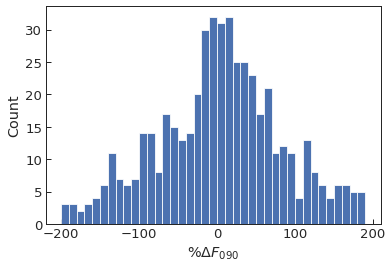

In [39]:
plt.hist(rel_delta_090*100, bins = np.arange(-200, 200, 10))
plt.xlabel(r'$\%\Delta F_{090}$')
plt.ylabel('Count')
plt.savefig('./plots/090_deficit_hist.pdf', dpi=600)
plt.show()

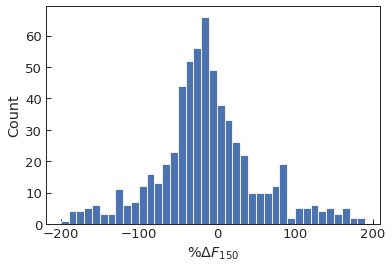

In [40]:
plt.hist(rel_delta_150*100, bins = np.arange(-200, 200, 10))
plt.xlabel(r'$\%\Delta F_{150}$')
plt.ylabel('Count')
plt.savefig('./plots/150_deficit_hist.pdf', dpi=600)
plt.show()

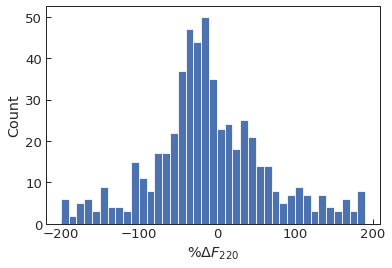

In [41]:
plt.hist(rel_delta_220*100, bins = np.arange(-200, 200, 10))
plt.xlabel(r'$\%\Delta F_{220}$')
plt.ylabel('Count')
plt.savefig('./plots/220_deficit_hist.pdf', dpi=600)
plt.show()

In [42]:
df = pd.DataFrame(np.stack([rel_delta_090*100, rel_delta_150*100, rel_delta_220*100]).T,
                   columns=[r'$\%\Delta F_{090}$', r'$\%\Delta F_{150}$', r'$\%\Delta F_{220}$'])

<Figure size 324.445x324.445 with 0 Axes>

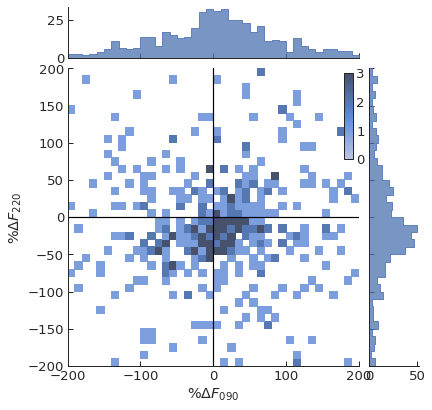

In [50]:
import matplotlib
matplotlib.rc('font',**{'family':'serif','sans-serif':['Times'],'size':16})

plt.rc('font',family='serif',size=16)
#plt.rc('text',usetex=True)

fullpage = False

# ------------------------------------------------------------------------------------------

dpi = 72.27*390.00/504.00

factory = 0.50
factorx = 1.00 if fullpage else 0.50
figsize = (factorx*504.00/dpi,factory*504.00/dpi)

fig = plt.figure(figsize=figsize)


sns.set_style("ticks", {"xtick.direction": "in","ytick.direction": "in"})
sns.set_context("paper",font_scale=1.5)
g = sns.JointGrid(data = df, x = r'$\%\Delta F_{090}$', y = r'$\%\Delta F_{220}$', marginal_ticks = True)

# Create an inset legend for the histogram colorbar
cax = g.fig.add_axes([.78, .6, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, #discrete=(True, False),
    #cmap="light:#03012d", 
    pmax=.8, cbar=True, cbar_ax=cax,
    bins = 40, binrange = (-200, 200)
)
g.plot_marginals(sns.histplot, bins = 40, binrange = (-200, 200), element="step")#, color="#03012d")

g.ax_marg_x.set_xlim(-200, 200)
g.ax_marg_y.set_ylim(-200, 200)

g.ax_joint.axvline(x=0, color='black')
g.ax_joint.axhline(y=0, color='black')

plt.savefig('./plots/090_vs_220_hist.pdf', dpi = 600)
plt.savefig('./plots/090_vs_220_hist.png', dpi = 600)
plt.show()
plt.close()

### No theory curve

In [83]:
with open('/home/r/rbond/jorlo/dev/minorplanets/normalized_theory_flux_dict.pk', 'rb') as f:
        theory_flux_dict = pk.load(f)

In [84]:
delta_150 = []
delta_220 = []

err_delta_150 = []
err_delta_220 = []

sn_090 = []
sn_150 = []
sn_220 = []


for i in range(1100):

    desig, name, semimajor = get_desig(i)
    
    flux_dir = '/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/'
    
    #if name in theory_flux_dict.keys(): continue
    try:
        with open(flux_dir+ '{}_flux_dict.pk'.format(name), 'rb') as f:
            flux_dict = pk.load(f)
    except:
        print('No flux dict')
        continue
        
    flux_pa4_150, err_pa4_150 = flux_dict['night']['pa4']['150']['flux'], flux_dict['night']['pa4']['150']['var']
    flux_pa4_220, err_pa4_220 = flux_dict['night']['pa4']['220']['flux'], flux_dict['night']['pa4']['220']['var']

    flux_pa5_090, err_pa5_090 = flux_dict['night']['pa5']['090']['flux'], flux_dict['night']['pa5']['090']['var']
    flux_pa5_150, err_pa5_150 = flux_dict['night']['pa5']['150']['flux'], flux_dict['night']['pa5']['150']['var']

    flux_pa6_090, err_pa6_090 = flux_dict['night']['pa6']['090']['flux'], flux_dict['night']['pa6']['090']['var']
    flux_pa6_150, err_pa6_150 = flux_dict['night']['pa6']['150']['flux'], flux_dict['night']['pa6']['150']['var']

    flux_090 = np.mean([flux_pa5_090, flux_pa6_090])
    flux_150 = np.mean([flux_pa4_150, flux_pa5_150, flux_pa6_150])
    flux_220 = flux_pa4_220
    
    err_090 = np.sqrt(err_pa5_090**2 + err_pa6_090**2)
    err_150 = np.sqrt(err_pa4_150**2 + err_pa5_150**2 + err_pa6_150**2)
    err_220 = err_pa4_220
    
    theory_150 = (150/90)**4*flux_090
    theory_220 = (220/90)**4*flux_090
    
    err_theory_150 = err_090/flux_090 * theory_150
    err_theory_220 = err_090/flux_090 * theory_220
    
    delta_150_curr = (flux_150 - theory_150)/theory_150
    delta_220_curr = (flux_220 - theory_220)/theory_220
    
    err_delta_150_curr = np.sqrt(err_150**2 + err_theory_150**2) / (flux_150 - theory_150) * delta_150_curr
    err_delta_220_curr = np.sqrt(err_220**2 + err_theory_220**2) / (flux_220 - theory_220) * delta_220_curr

    delta_150.append(delta_150_curr)
    delta_220.append(delta_220_curr)
    
    err_delta_150.append(err_delta_150_curr)
    err_delta_220.append(err_delta_220_curr)
    
    try:
        sn_090_cur = flux_090 / err_090
        sn_150_cur = flux_150 / err_150
        sn_220_cur = flux_220 / err_220
    except ZeroDivisionError:
        print('Divided by zero')
        continue
    
    sn_090.append(sn_090_cur)
    sn_150.append(sn_150_cur)
    sn_220.append(sn_220_cur)
    
sn_090 = np.array(sn_090)
sn_150 = np.array(sn_150)
sn_220 = np.array(sn_220)

delta_150 = np.array(delta_150)
delta_220 = np.array(delta_220)

err_delta_150 = np.array(err_delta_150)
err_delta_220 = np.array(err_delta_220)

/tmp/ipykernel_26783/710335829.py:46: RuntimeWarning: invalid value encountered in double_scalars
  err_theory_150 = err_090/flux_090 * theory_150
/tmp/ipykernel_26783/710335829.py:47: RuntimeWarning: invalid value encountered in double_scalars
  err_theory_220 = err_090/flux_090 * theory_220
/tmp/ipykernel_26783/710335829.py:49: RuntimeWarning: invalid value encountered in double_scalars
  delta_150_curr = (flux_150 - theory_150)/theory_150
/tmp/ipykernel_26783/710335829.py:50: RuntimeWarning: invalid value encountered in double_scalars
  delta_220_curr = (flux_220 - theory_220)/theory_220
/tmp/ipykernel_26783/710335829.py:62: RuntimeWarning: invalid value encountered in double_scalars
  sn_090_cur = flux_090 / err_090
/tmp/ipykernel_26783/710335829.py:63: RuntimeWarning: invalid value encountered in double_scalars
  sn_150_cur = flux_150 / err_150


Divided by zero
Divided by zero
No flux dict
No flux dict
No flux dict
Divided by zero
Divided by zero


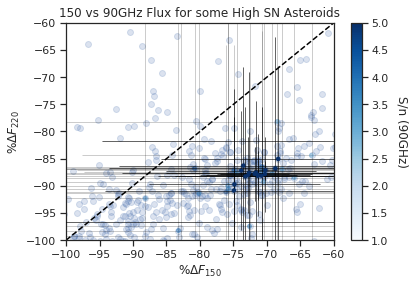

In [85]:
## blue-orange colormap:
import matplotlib.cm as cm

top = cm.get_cmap('Blues_r', 128)
newcolors = np.vstack((top(np.linspace(1, 0, 128))))#,bottom(numpy.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('model', cmap = ListedColormap(newcolors))
cmap = 'model'
#######

flags_3 = np.where((sn_090 >= 3) & (sn_150 >= 3) & (sn_220 >= 3))[0]
flags_5 = np.where((sn_090 >= 5) & (sn_150 >= 5) & (sn_220 >= 5))[0]

#flags = np.ones(len(delta_090), dtype=bool)


fig, ax = plt.subplots(1,1)

#plt.scatter(delta_090[flags], delta_220[flags], zorder = 2, s = 5, c =sn_220[flags], vmin = 1, vmax = 5, cmap=cmap)
#plt.errorbar(delta_090[flags], delta_220[flags], xerr=delta_090_err[flags], yerr=delta_220_err[flags],
#             fmt='o', alpha = 0.4, ecolor = 'black', zorder = 1, ms = 1, elinewidth = 1.)

plt.scatter(100*delta_150, 100*delta_220, zorder = 0, alpha = 0.2)

plt.scatter(100*delta_150[flags_3], 100*delta_220[flags_3], zorder = 2, s = 15, c =sn_090[flags_3], vmin = 1, vmax = 5, cmap=cmap, alpha = 0.4)
plt.errorbar(100*delta_150[flags_3], 100*delta_220[flags_3], xerr=100*err_delta_150[flags_3], yerr=100*err_delta_220[flags_3],
             fmt='o', alpha = 0.2, ecolor = 'black', zorder = 1, ms = 1, elinewidth = 1.)

plt.scatter(100*delta_150[flags_5], 100*delta_220[flags_5], zorder = 4, s = 10, c =sn_150[flags_5], vmin = 1, vmax = 5, cmap=cmap)
plt.errorbar(100*delta_150[flags_5], 100*delta_220[flags_5], xerr=100*err_delta_150[flags_5], yerr=100*err_delta_220[flags_5],
             fmt='o', alpha = 0.5, ecolor = 'black', zorder = 3, ms = 1, elinewidth = 1.)

ax.axhline(0, color = 'black', linewidth=1.)
ax.axvline(0, color = 'black', linewidth=1.)

lim = -100

plt.xlim(lim,-60)
plt.ylim(lim,-60)

xs = np.linspace(lim, 10)

cbar = plt.colorbar()
cbar.set_label('S/n (90GHz)', rotation=270, labelpad = 20)

#ax.annotate("Relative deficit at 220GHz", xy = (-20, -20), size = 10, xytext = (-50, -60), color = "darkred")
#ax.annotate("Relative deficit at 150GHz", xy = (-20, -20), size = 10, xytext = (-50, -5), color = "darkred")

plt.plot(xs, xs, ls = '--', c = 'black')
plt.xlabel(r'$\%\Delta F_{150}$')
plt.ylabel(r'$\%\Delta F_{220}$')

plt.title('150 vs 90GHz Flux for some High SN Asteroids')
plt.savefig('delta_F_no_theory.pdf',dpi=600)
plt.savefig('delta_F_no_theory.png', dpi=600)

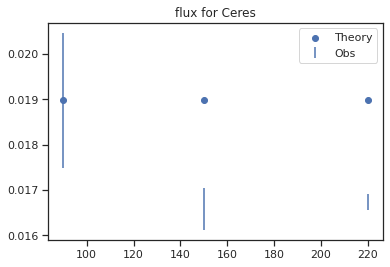

153.73294


In [11]:
for i in range(2):

    desig, name, semimajor = get_desig(i)
    
    flux_dir = '/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/'
    
    if name in theory_flux_dict.keys(): continue
    try:
        with open(flux_dir+ '{}_flux_dict.pk'.format(name), 'rb') as f:
            flux_dict = pk.load(f)
    except: continue
        
    flux_pa4_150, err_pa4_150 = flux_dict['pa4']['150']['flux'], flux_dict['pa4']['150']['var']
    flux_pa4_220, err_pa4_220 = flux_dict['pa4']['220']['flux'], flux_dict['pa4']['220']['var']

    flux_pa5_090, err_pa5_090 = flux_dict['pa5']['090']['flux'], flux_dict['pa5']['090']['var']
    flux_pa5_150, err_pa5_150 = flux_dict['pa5']['150']['flux'], flux_dict['pa5']['150']['var']

    flux_pa6_090, err_pa6_090 = flux_dict['pa6']['090']['flux'], flux_dict['pa6']['090']['var']
    flux_pa6_150, err_pa6_150 = flux_dict['pa6']['150']['flux'], flux_dict['pa6']['150']['var']

    flux_090 = np.mean([flux_pa5_090, flux_pa6_090])
    flux_150 = np.mean([flux_pa4_150, flux_pa5_150, flux_pa6_150])
    flux_220 = flux_pa4_220
    
    err_090 = np.sqrt(err_pa5_090**2 + err_pa6_090**2)
    err_150 = np.sqrt(err_pa4_150**2 + err_pa5_150**2 + err_pa6_150**2)
    err_220 = err_pa4_220
    
    theory_150 = (150/90)**2*flux_090
    theory_220 = (220/90)**2*flux_090
    
    plt.errorbar([90, 150, 220], [flux_090/90**2, flux_150/150**2, flux_220/220**2], 
                 yerr = [err_090/90**2, err_150/150**2, err_220/220**2], linestyle = 'none', label = 'Obs')
    plt.scatter([90, 150, 220], [flux_090/90**2, theory_150/150**2, theory_220/220**2], label = 'Theory')
    plt.title('flux for {}'.format(name))
    plt.legend()
    plt.show()
    plt.close()
    
    print(flux_090)

In [14]:
with open(flux_dir+ '{}_flux_dict.pk'.format('Ceres'), 'rb') as f:
    flux_dict = pk.load(f)

In [15]:
flux_dict

{'pa4': {'150': {'flux': array(448.04675, dtype=float32),
   'var': 5.551828407460308},
  '220': {'flux': array(810.1595, dtype=float32), 'var': 8.535998553523786}},
 'pa5': {'090': {'flux': array(202.54172, dtype=float32),
   'var': 2.5486466688764677},
  '150': {'flux': array(442.28232, dtype=float32), 'var': 3.0954410130229357}},
 'pa6': {'090': {'flux': array(104.924164, dtype=float32),
   'var': 11.819935183880514},
  '150': {'flux': array(228.62582, dtype=float32), 'var': 8.324386915767402}}}

In [ ]:
xs = np.linspace(1,1e4, 1000)*u.GHz

bb1 = models.BlackBody(temperature = 100*u.K)
bb2 = models.BlackBody(temperature = 200*u.K)
bb3 = models.BlackBody(temperature = 40*u.K)
bb4 = models.BlackBody(temperature = 400*u.K)

plt.xlim(300, 10)
plt.ylim(1e-4,1)
plt.plot(xs, bb4(xs)/xs**4*10**18, label = '400K')
plt.plot(xs, bb2(xs)/xs**4*10**18, label = '200K')
plt.plot(xs, bb1(xs)/xs**4*10**18, label = '100K')
plt.plot(xs, bb3(xs)/xs**4*10**18, label = '40K')

plt.yscale('log')
plt.xscale('log')

plt.legend()

In [ ]:
## blue-orange colormap:
import matplotlib.cm as cm

top = cm.get_cmap('Blues_r', 128)
newcolors = np.vstack((top(np.linspace(1, 0, 128))))#,bottom(numpy.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('model', cmap = ListedColormap(newcolors))
cmap = 'model'
#######

flags = np.where((sn_090 >=3) & (sn_220>= 3))[0]

#flags = np.ones(len(delta_090), dtype=bool)

lim = 100

#plt.scatter(delta_090[flags], delta_220[flags], zorder = 2, s = 5, c =sn_220[flags], vmin = 1, vmax = 5, cmap=cmap)
#plt.errorbar(delta_090[flags], delta_220[flags], xerr=delta_090_err[flags], yerr=delta_220_err[flags],
#             fmt='o', alpha = 0.4, ecolor = 'black', zorder = 1, ms = 1, elinewidth = 1.)

plt.scatter(flux_90[flags], delta_090_220[flags], zorder = 2, s = 5, c =sn_220[flags], vmin = 1, vmax = 5, cmap=cmap)
plt.errorbar(flux_90[flags], delta_090_220[flags], xerr=flux_90_err[flags], yerr=delta_090_220_err[flags],
             fmt='o', alpha = 0.3, ecolor = 'black', zorder = 1, ms = 1, elinewidth = 1.)

plt.xlim(-0.1,lim)
plt.ylim(-0.1,lim)

xs = np.linspace(-0.1,lim)

cbar = plt.colorbar()
cbar.set_label('S/n (220GHz)', rotation=270, labelpad = 20)

plt.plot(xs, xs, ls = '--', c = 'black')
plt.xlabel(r'$\%\Delta F_{90}$')
plt.ylabel(r'$\%\Delta F_{220}$')

plt.title('220 vs 90GHz Flux for some High SN Asteroids')
plt.savefig('delta_F_ratio.pdf',dpi=600)
plt.savefig('delta_F_ratio.png', dpi=600)

In [ ]:
normalized = True

if normalized:
    with open('/home/r/rbond/jorlo/dev/minorplanets/normalized_theory_flux_dict.pk', 'rb') as f:
        theory_flux_dict = pk.load(f)
else:
    with open('/home/r/rbond/jorlo/dev/minorplanets/theory_flux_dict.pk', 'rb') as f:
        theory_flux_dict = pk.load(f)  

rel_delta_150 = []
rel_delta_220 = []

rel_delta_150_err = []
rel_delta_220_err = []

delta_150 = []
delta_220 = []

delta_150_err = []
delta_220_err = []

sn_150 = []
sn_220 = []

delta_150_220 = []
delta_150_220_err = []

flux_150s = []
flux_150_errs = []

for i in range(1100):

    desig, name, semimajor = get_desig(i)
    
    flux_dir = '/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/'
    
    if name not in theory_flux_dict.keys(): continue
    try:
        with open(flux_dir+ '{}_flux_dict.pk'.format(name), 'rb') as f:
            flux_dict = pk.load(f)
    except: continue
        
    flux_pa4_150, err_pa4_150 = flux_dict['night']['pa4']['150']['flux'], flux_dict['night']['pa4']['150']['var']
    flux_pa4_220, err_pa4_220 = flux_dict['night']['pa4']['220']['flux'], flux_dict['night']['pa4']['220']['var']

    flux_pa5_090, err_pa5_090 = flux_dict['night']['pa5']['090']['flux'], flux_dict['night']['pa5']['090']['var']
    flux_pa5_150, err_pa5_150 = flux_dict['night']['pa5']['150']['flux'], flux_dict['night']['pa5']['150']['var']

    flux_pa6_090, err_pa6_090 = flux_dict['night']['pa6']['090']['flux'], flux_dict['night']['pa6']['090']['var']
    flux_pa6_150, err_pa6_150 = flux_dict['night']['pa6']['150']['flux'], flux_dict['night']['pa6']['150']['var']
    
    #err_pa4_150 = max(err_pa4_150, 0.05*flux_pa4_150)    
    #err_pa4_220 = max(err_pa4_220, 0.05*flux_pa4_220)
    
    #err_pa5_090 = max(err_pa5_090, 0.05*flux_pa5_090)
    #err_pa5_150 = max(err_pa5_150, 0.05*flux_pa5_150)
    
    #err_pa6_090 = max(err_pa6_090, 0.05*flux_pa6_090)
    #err_pa6_150 = max(err_pa6_150, 0.05*flux_pa6_150)
    
    theory_flux_090 = max(theory_flux_dict[name]['run5b'][0], theory_flux_dict[name]['run5a'][0])
    theory_flux_150 = max(theory_flux_dict[name]['run5b'][1], theory_flux_dict[name]['run5a'][1])
    theory_flux_220 = max(theory_flux_dict[name]['run5b'][2], theory_flux_dict[name]['run5a'][2])
    
    if err_pa4_150 == 0:
        err_pa4_150 = 999999
    if err_pa5_150 == 0:
        err_pa5_150 = 999999
    if err_pa6_150 == 0:
        err_pa6_150 = 999999
    if err_pa4_220 == 0:
        err_pa4_220 = 999999
    if err_pa5_090 == 0:
        err_pa5_090 = 999999
    if err_pa6_090 == 0:
        err_pa6_090 = 999999
        
    flux_090, err_090 = inv_var([flux_pa5_090, flux_pa6_090], [err_pa5_090, err_pa6_090])
    flux_150, err_150 = inv_var([flux_pa4_150, flux_pa5_150, flux_pa6_150], [err_pa4_150, err_pa5_150, err_pa6_150])
    flux_220, err_220 = flux_pa4_220, err_pa4_220
    
    
    err_090 = max(0.01*flux_090, err_090)
    err_150 = max(0.01*flux_150, err_150)
    err_220 = max(0.01*flux_220, err_220)

    rel_delta_150_cur = (flux_150 - theory_flux_150)/theory_flux_150
    rel_delta_220_cur = (flux_220 - theory_flux_220)/theory_flux_220
    
    delta_150_cur = (flux_150 - theory_flux_150)
    delta_220_cur = (flux_220 - theory_flux_220)
    
    rel_delta_150.append(rel_delta_150_cur)
    rel_delta_220.append(rel_delta_220_cur)
    
    delta_150.append(delta_150_cur)
    delta_220.append(delta_220_cur)
    
    delta_150_err_cur = err_150
    delta_220_err_cur = err_220
    
    delta_150_err.append(delta_150_err_cur)
    delta_220_err.append(delta_220_err_cur)
    
    rel_delta_150_err_cur = rel_delta_150_cur * (delta_150_err_cur / delta_150_cur)
    rel_delta_220_err_cur = rel_delta_220_cur * (delta_220_err_cur / delta_220_cur)
    
    rel_delta_150_err.append(rel_delta_150_err_cur)
    rel_delta_220_err.append(rel_delta_220_err_cur)
    
    sn_150_cur = flux_150 / err_150
    sn_220_cur = flux_220 / err_220
    
    sn_150.append(sn_150_cur)
    sn_220.append(sn_220_cur)
    
    delta_150_220_cur = delta_220_cur / delta_150_cur
    delta_150_220_err_cur = delta_150_220_cur * (delta_150_err_cur/delta_150_cur + delta_220_err_cur/delta_220_cur)

    delta_150_220.append(delta_150_220_cur)
    delta_150_220_err.append(delta_150_220_err_cur)
    
    flux_150s.append(flux_150)
    flux_150_errs.append(err_150)
    
    if rel_delta_150_cur > 0.5 and rel_delta_220_cur >0.5 and sn_150_cur > 3 and sn_220_cur > 3:
        print(name)


rel_delta_150 = np.array(rel_delta_150)
rel_delta_220 = np.array(rel_delta_220)

delta_150 = np.array(delta_150)
delta_220 = np.array(delta_220)

delta_150_err = np.array(delta_150_err)
delta_220_err = np.array(delta_220_err)

rel_delta_150_err = np.array(rel_delta_150_err)
rel_delta_220_err = np.array(rel_delta_220_err)

sn_150 = np.array(sn_150)
sn_220 = np.array(sn_220)

delta_150_220 = np.array(delta_150_220)
delta_150_220_err = np.array(delta_150_220_err)

flux_150s = np.array(flux_150s)
flux_150_errs = np.array(flux_150_errs)

In [ ]:
rel_delta_090 = []
rel_delta_150 = []

rel_delta_090_err = []
rel_delta_150_err = []

delta_090 = []
delta_150 = []

delta_090_err = []
delta_150_err = []

sn_090 = []
sn_150 = []

delta_090_150 = []
delta_090_150_err = []

flux_90 = []
flux_90_err = []

for i in range(1100):

    desig, name, semimajor = get_desig(i)
    
    flux_dir = '/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/'
    
    if name not in theory_flux_dict.keys(): continue
    try:
        with open(flux_dir+ '{}_flux_dict.pk'.format(name), 'rb') as f:
            flux_dict = pk.load(f)
    except: continue
        
    flux_pa4_150, err_pa4_150 = flux_dict['night']['pa4']['150']['flux'], flux_dict['night']['pa4']['150']['var']
    flux_pa4_220, err_pa4_220 = flux_dict['night']['pa4']['220']['flux'], flux_dict['night']['pa4']['220']['var']

    flux_pa5_090, err_pa5_090 = flux_dict['night']['pa5']['090']['flux'], flux_dict['night']['pa5']['090']['var']
    flux_pa5_150, err_pa5_150 = flux_dict['night']['pa5']['150']['flux'], flux_dict['night']['pa5']['150']['var']

    flux_pa6_090, err_pa6_090 = flux_dict['night']['pa6']['090']['flux'], flux_dict['night']['pa6']['090']['var']
    flux_pa6_150, err_pa6_150 = flux_dict['night']['pa6']['150']['flux'], flux_dict['night']['pa6']['150']['var']

    theory_flux_090 = max(theory_flux_dict[name]['run5b'][0], theory_flux_dict[name]['run5a'][0])
    theory_flux_150 = max(theory_flux_dict[name]['run5b'][1], theory_flux_dict[name]['run5a'][1])
    theory_flux_220 = max(theory_flux_dict[name]['run5b'][2], theory_flux_dict[name]['run5a'][2])
    
    if err_pa4_150 == 0:
        err_pa4_150 = 999999
    if err_pa5_150 == 0:
        err_pa5_150 = 999999
    if err_pa6_150 == 0:
        err_pa6_150 = 999999
    if err_pa4_220 == 0:
        err_pa4_220 = 999999
    if err_pa5_090 == 0:
        err_pa5_090 = 999999
    if err_pa6_090 == 0:
        err_pa6_090 = 999999
        
    flux_090, err_090 = inv_var([flux_pa5_090, flux_pa6_090], [err_pa5_090, err_pa6_090])
    flux_150, err_150 = inv_var([flux_pa4_150, flux_pa5_150, flux_pa6_150], [err_pa4_150, err_pa5_150, err_pa6_150])
    flux_220, err_220 = flux_pa4_220, err_pa4_220
    
    
    err_090 = max(0.01*flux_090, err_090)
    err_150 = max(0.01*flux_150, err_150)
    err_220 = max(0.01*flux_220, err_220)

    rel_delta_150_cur = (flux_150 - theory_flux_150)/theory_flux_150
    rel_delta_090_cur = (flux_090 - theory_flux_090)/theory_flux_090
    
    delta_150_cur = (flux_150 - theory_flux_150)
    delta_090_cur = (flux_090 - theory_flux_090)
    
    rel_delta_150.append(rel_delta_150_cur)
    rel_delta_090.append(rel_delta_090_cur)
    
    delta_150.append(delta_150_cur)
    delta_090.append(delta_090_cur)
    
    delta_150_err_cur = err_150
    delta_090_err_cur = err_090
    
    delta_150_err.append(delta_150_err_cur)
    delta_090_err.append(delta_090_err_cur)
    
    rel_delta_150_err_cur = rel_delta_150_cur * (delta_150_err_cur / delta_150_cur)
    rel_delta_090_err_cur = rel_delta_090_cur * (delta_090_err_cur / delta_090_cur)
    
    rel_delta_150_err.append(rel_delta_150_err_cur)
    rel_delta_090_err.append(rel_delta_090_err_cur)
    
    sn_150_cur = flux_150 / err_150
    sn_090_cur = flux_090 / err_090
    
    sn_150.append(sn_150_cur)
    sn_090.append(sn_090_cur)
    
    delta_090_150_cur = delta_150_cur / delta_090_cur
    delta_090_150_err_cur = delta_090_150_cur * (delta_150_err_cur/delta_150_cur + delta_090_err_cur/delta_090_cur)

    delta_090_150.append(delta_090_150_cur)
    delta_090_150_err.append(delta_090_150_err_cur)
    
    flux_90.append(flux_090)
    flux_90_err.append(err_090)
    
    if rel_delta_150_cur > 0.5 and rel_delta_090_cur >0.5 and sn_150_cur > 3 and sn_090_cur > 3:
        print(name)


rel_delta_090 = np.array(rel_delta_090)
rel_delta_150 = np.array(rel_delta_150)

delta_090 = np.array(delta_090)
delta_150 = np.array(delta_150)

delta_090_err = np.array(delta_090_err)
delta_150_err = np.array(delta_150_err)

rel_delta_090_err = np.array(rel_delta_090_err)
rel_delta_150_err = np.array(rel_delta_150_err)

sn_090 = np.array(sn_090)
sn_150 = np.array(sn_150)

delta_090_150 = np.array(delta_090_150)
delta_090_150_err = np.array(delta_090_150_err)

flux_90 = np.array(flux_90)
flux_90_err = np.array(flux_90_err)